In [3]:
# regression problem statement with ANN
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv') # loading dataset in dataframe

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
df.drop(columns=['Serial No.'],inplace=True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
# normalizing the input values by min-max sclaing becuase the limits of each input is known

In [10]:
# 7inputs and 7 hidden nodes 1 output node

In [11]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)
xtrain

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]], shape=(400, 7))

In [14]:
pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 1.3 MB/s eta 0:04:12
   ---------------------------------------- 0.8/332.0 MB 949.8 kB/s eta 0:05:49
   ---------------------------------------- 0.8/332.0 MB 949.8 kB/s eta 0:05:49
   ---------------------------------------- 1.3/332.0 MB 1.1 MB/s eta 0:05:03
   ---------------------------------------- 1.3/332.0 MB 1.1 MB/s eta 0:05:03
   ---------------------------------------- 1.6/332.0 MB 1.0 MB/s eta 0:05:16
   ---------------------------------------- 2.1/332.0 MB 1.1 MB/s eta 0:04:48
   ---------------------------------------- 2.4/332.0 MB 1.2 MB/s eta 0:04:36
   ---------------------------------------- 2.9/332.0 MB 1.3 MB/s eta 0:04:12
   ---------------------------------------- 3.1/332.0 MB 1.3 MB/s eta 0:04:14
   

In [15]:
# building architecture of neural networks
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

In [16]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))# input layer as well as the hidden layer
model.add(Dense(1,activation='linear')) # output layer
model.summary()

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

# 1️⃣ Define custom R² metric function
def r2_metric(y_true, y_pred):
    ss_res =  K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res/(ss_tot + K.epsilon())

In [18]:
model.compile(optimizer='adam', loss='mse', metrics=['mae',r2_metric])
history=model.fit(xtrain,ytrain,epochs=200,validation_split=0.2)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1597 - mae: 0.3767 - r2_metric: -6.9965 - val_loss: 0.1519 - val_mae: 0.3648 - val_r2_metric: -11.4198
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1121 - mae: 0.3076 - r2_metric: -4.5015 - val_loss: 0.1071 - val_mae: 0.2936 - val_r2_metric: -7.6796
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0766 - mae: 0.2457 - r2_metric: -2.8605 - val_loss: 0.0745 - val_mae: 0.2330 - val_r2_metric: -4.9537
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0519 - mae: 0.1933 - r2_metric: -1.5930 - val_loss: 0.0521 - val_mae: 0.1891 - val_r2_metric: -3.0386
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0367 - mae: 0.1562 - r2_metric: -0.8992 - val_loss: 0.0395 - val_mae: 0.1584 - val_r2_metric: -1.9352
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - mae: 0.1372 - r2_metric: -0.5660 - val_loss: 0.0351 - val_mae: 0.1498 - val_r2_metric: -1.5446
Epoch 7/200
10/10 ━━

In [19]:
from sklearn.metrics import r2_score
ypred=model.predict(xtest)
r2_score(ytest,ypred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


0.8150638813062703

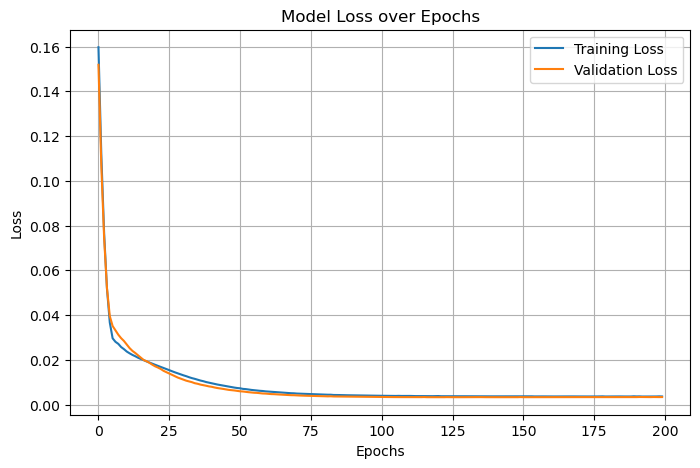

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
print(history.history.keys())


dict_keys(['loss', 'mae', 'r2_metric', 'val_loss', 'val_mae', 'val_r2_metric'])


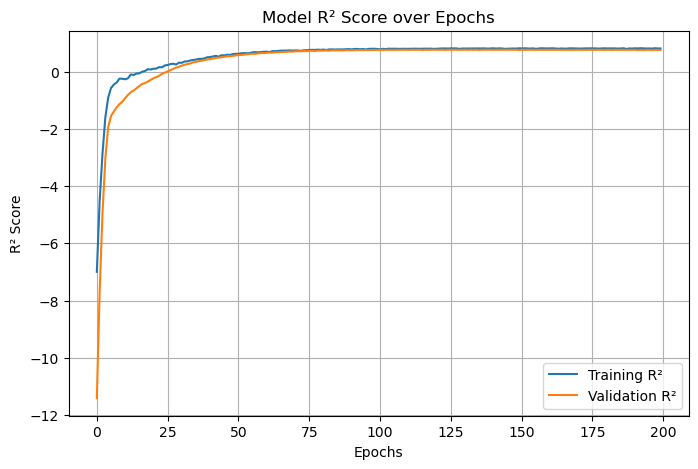

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['r2_metric'], label='Training R²')
plt.plot(history.history['val_r2_metric'], label='Validation R²')
plt.title('Model R² Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.show()


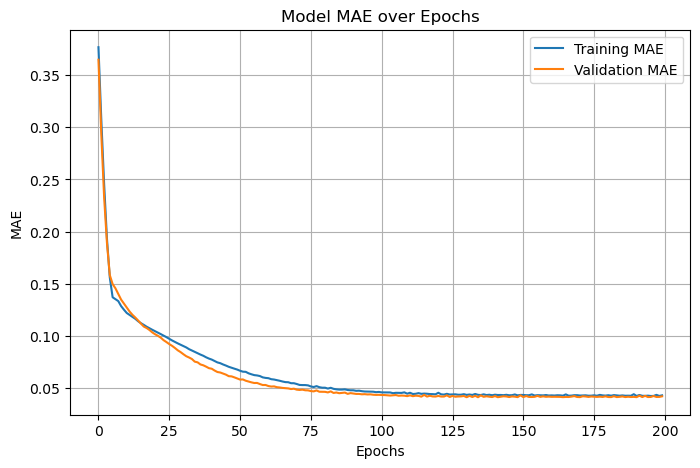

In [23]:
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()
